In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from urllib.request import urlopen as uo

url = 'https://www.worldometers.info/world-population/population-by-country/'
response = uo(url)
response_page=response.read()
soup = bs(response_page, 'html.parser')

soup


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Population by Country (2023) - Worldometer</title><meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link

In [2]:
table=soup.find('table',{'id':'example2'})
# table

In [3]:
header = [] #th-->table header
for th in table.find_all('th')[:-1]:
    header.append(th.text.strip())

In [4]:
header

['#',
 'Country (or dependency)',
 'Population (2020)',
 'Yearly Change',
 'Net Change',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med. Age',
 'Urban Pop %']

In [5]:
data = [] #tr-->table record
for tr in table.find_all('tr')[1:]:
    row = []
    for td in tr.find_all('td')[:-1]:
        row.append(td.text.strip())
    data.append(row)

In [6]:
data

[['1',
  'China',
  '1,439,323,776',
  '0.39 %',
  '5,540,090',
  '153',
  '9,388,211',
  '-348,399',
  '1.7',
  '38',
  '61 %'],
 ['2',
  'India',
  '1,380,004,385',
  '0.99 %',
  '13,586,631',
  '464',
  '2,973,190',
  '-532,687',
  '2.2',
  '28',
  '35 %'],
 ['3',
  'United States',
  '331,002,651',
  '0.59 %',
  '1,937,734',
  '36',
  '9,147,420',
  '954,806',
  '1.8',
  '38',
  '83 %'],
 ['4',
  'Indonesia',
  '273,523,615',
  '1.07 %',
  '2,898,047',
  '151',
  '1,811,570',
  '-98,955',
  '2.3',
  '30',
  '56 %'],
 ['5',
  'Pakistan',
  '220,892,340',
  '2.00 %',
  '4,327,022',
  '287',
  '770,880',
  '-233,379',
  '3.6',
  '23',
  '35 %'],
 ['6',
  'Brazil',
  '212,559,417',
  '0.72 %',
  '1,509,890',
  '25',
  '8,358,140',
  '21,200',
  '1.7',
  '33',
  '88 %'],
 ['7',
  'Nigeria',
  '206,139,589',
  '2.58 %',
  '5,175,990',
  '226',
  '910,770',
  '-60,000',
  '5.4',
  '18',
  '52 %'],
 ['8',
  'Bangladesh',
  '164,689,383',
  '1.01 %',
  '1,643,222',
  '1,265',
  '130,170',
 

In [7]:
df =pd.DataFrame(data = data, columns=header)
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %


In [8]:
df.to_csv('world_population_data.csv', index = False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
dtypes: object(11)
memory usage: 20.3+ KB


In [10]:
df.isnull().sum()

#                          0
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
dtype: int64

In [11]:
comma_removal_cols=['Population (2020)','Net Change','Migrants (net)','Land Area (Km²)','Urban Pop %','Yearly Change','Fert. Rate','Density (P/Km²)','Med. Age']
for col in comma_removal_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').str.replace('%', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,1,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0
1,2,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0
2,3,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0
3,4,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0
4,5,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        235 non-null    int64  
 3   Yearly Change            235 non-null    float64
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               201 non-null    float64
 9   Med. Age                 201 non-null    float64
 10  Urban Pop %              222 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 20.3+ KB


In [13]:
print(df.sort_values('Land Area (Km²)', ascending=False)['Country (or dependency)'].head(10))

8            Russia
0             China
2     United States
38           Canada
5            Brazil
54        Australia
1             India
31        Argentina
63       Kazakhstan
32          Algeria
Name: Country (or dependency), dtype: object


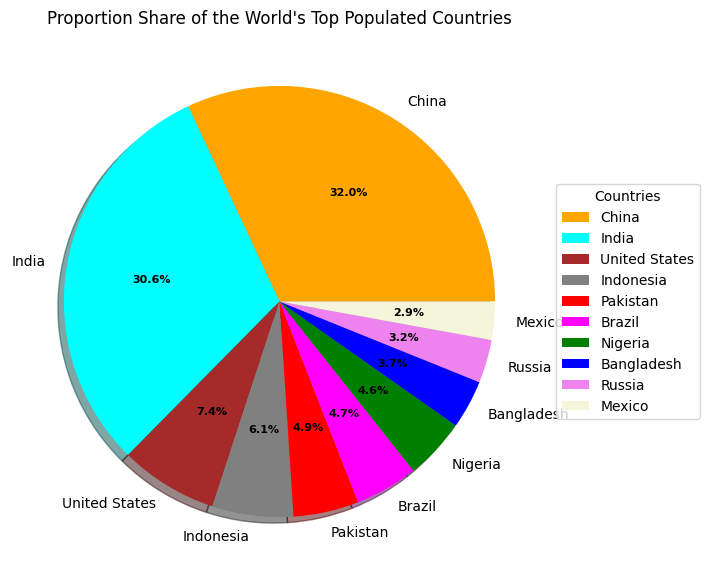

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
colors = ("orange", "cyan", "brown", "grey", "red", "magenta", "green", "blue", "violet", "beige")

# Sort the DataFrame based on 'Population (2020)' column in descending order
df_sorted = df.sort_values('Population (2020)', ascending=False)

# Get the top 10 countries and their labels
top_10_countries = df_sorted.head(10)
labels = top_10_countries['Country (or dependency)']

# Plot the pie chart
wedges, texts, autotexts = ax.pie(top_10_countries['Population (2020)'], labels=labels, autopct='%1.1f%%',
                                 shadow=True, colors=colors)

ax.legend(wedges, labels, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Proportion Share of the World's Top Populated Countries")

# Show the plot
plt.show()

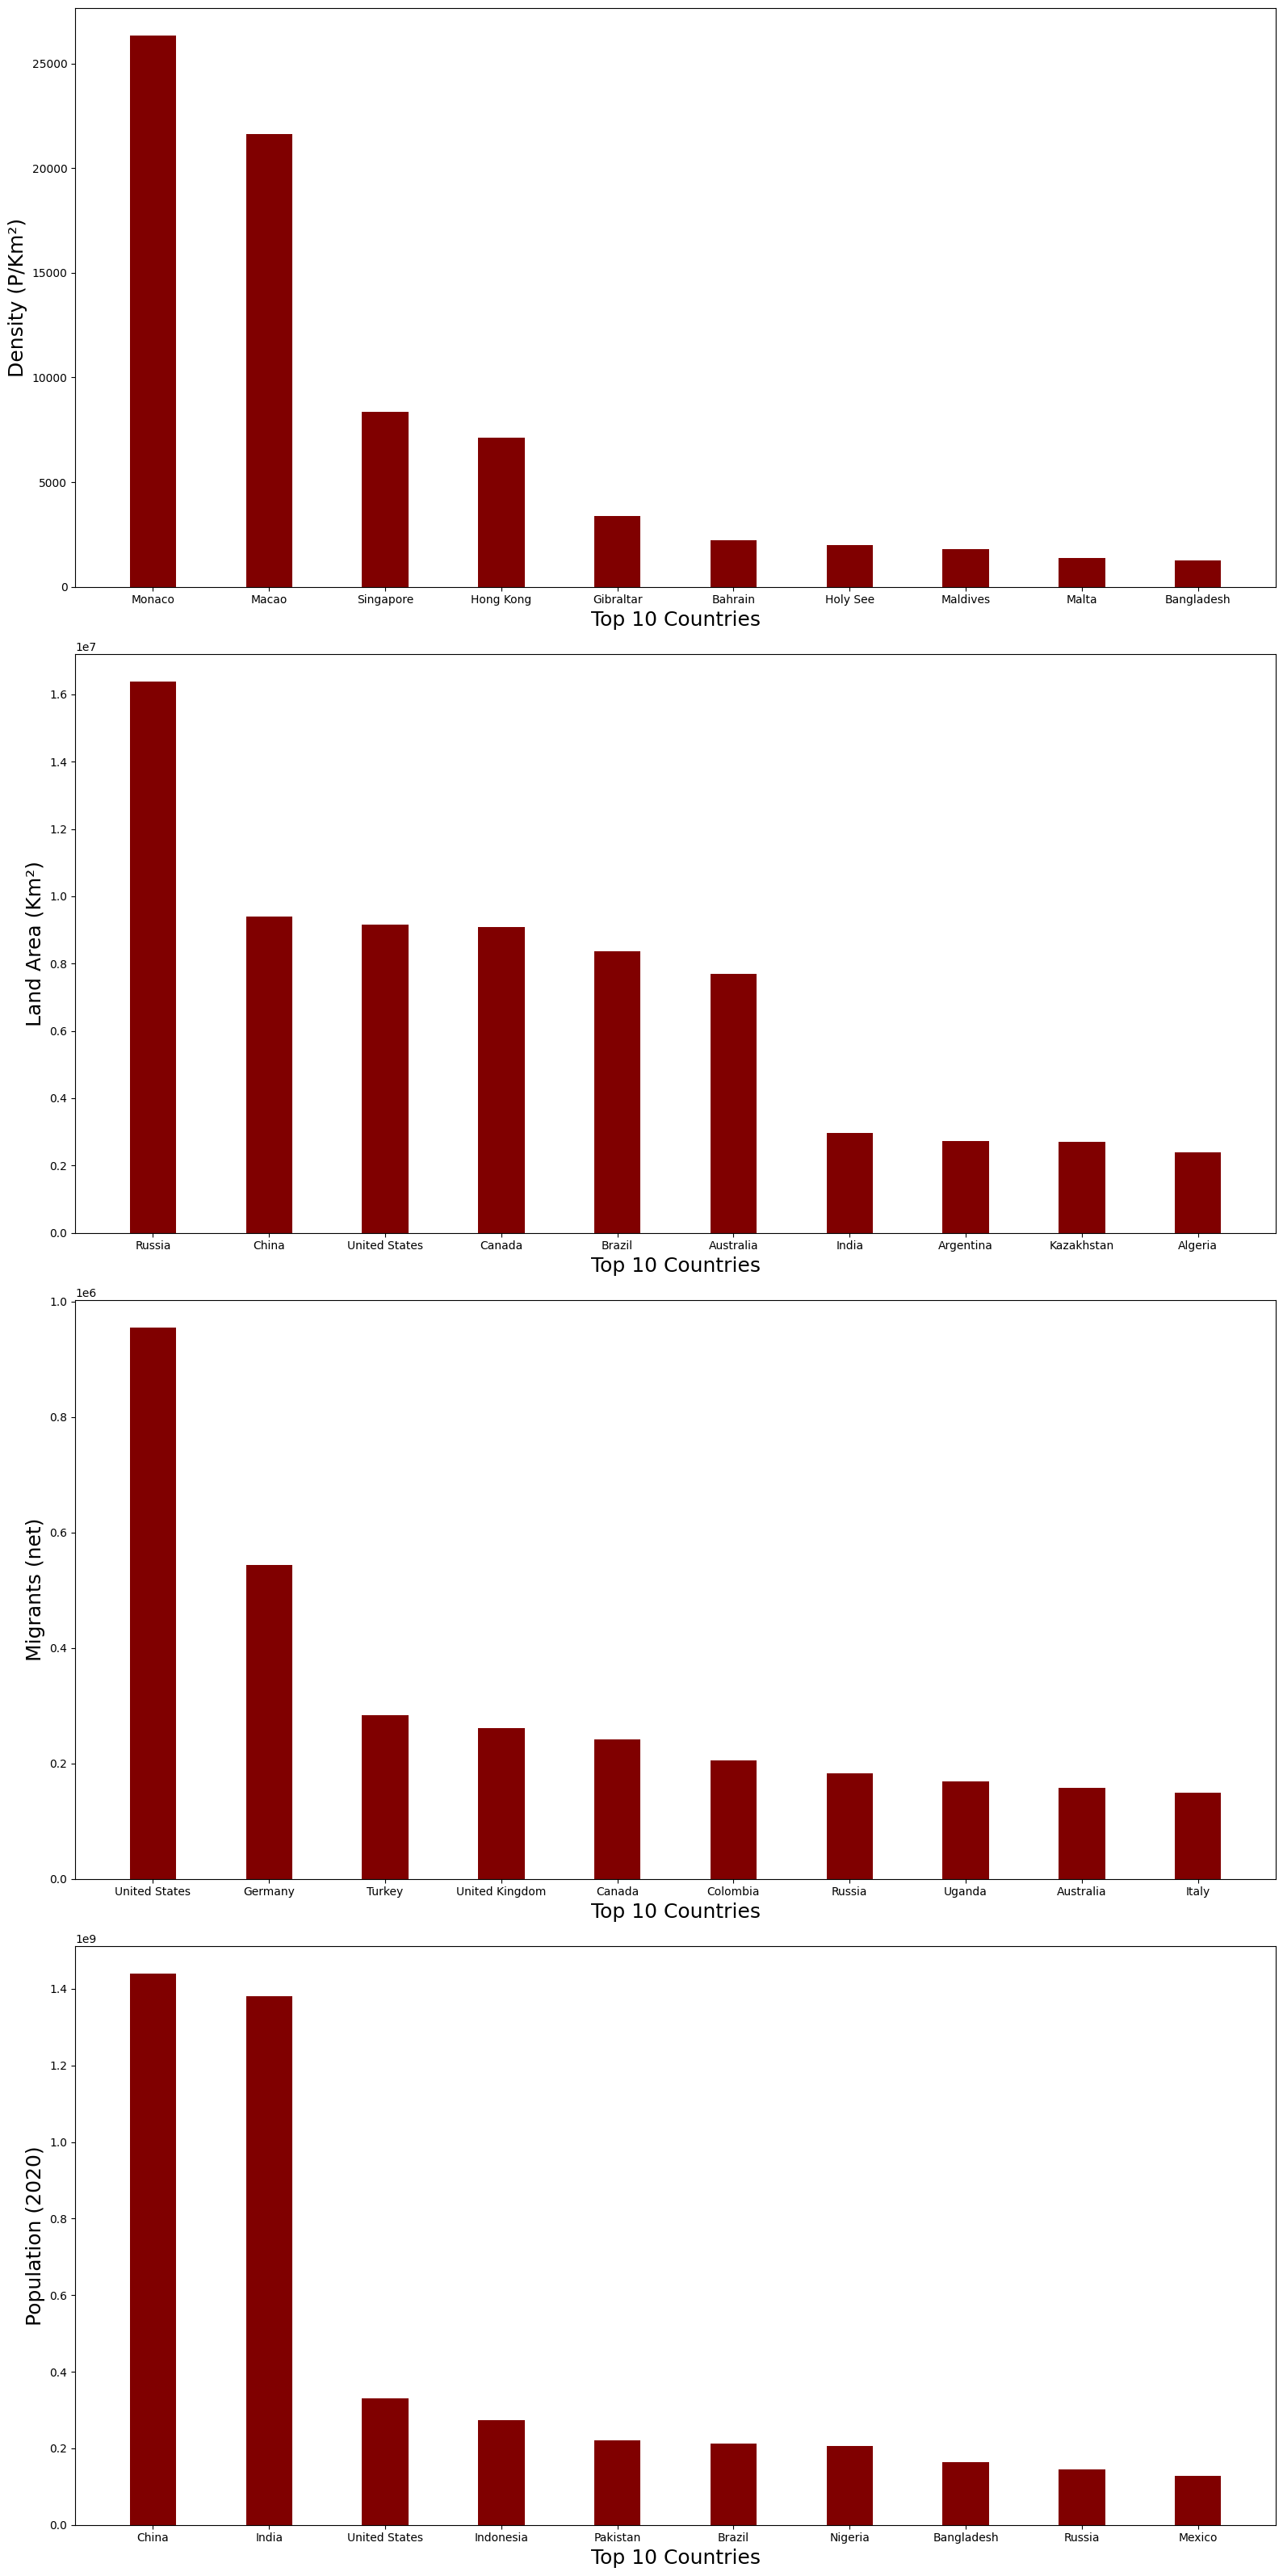

In [15]:
import matplotlib.pyplot as plt
cols=['Density (P/Km²)','Land Area (Km²)','Migrants (net)','Population (2020)']
plt.figure(figsize=(16,32))
for i,col in enumerate(cols):
    plt.subplot(4,1,i+1)
    plt.bar(df.sort_values(col, ascending=False)['Country (or dependency)'].head(10),df.sort_values(col, ascending=False)[col].head(10),color ='maroon',
        width = 0.4)
    plt.xlabel('Top 10 Countries',fontsize=18)
    plt.ylabel(col,fontsize=18)
    plt.tight_layout()

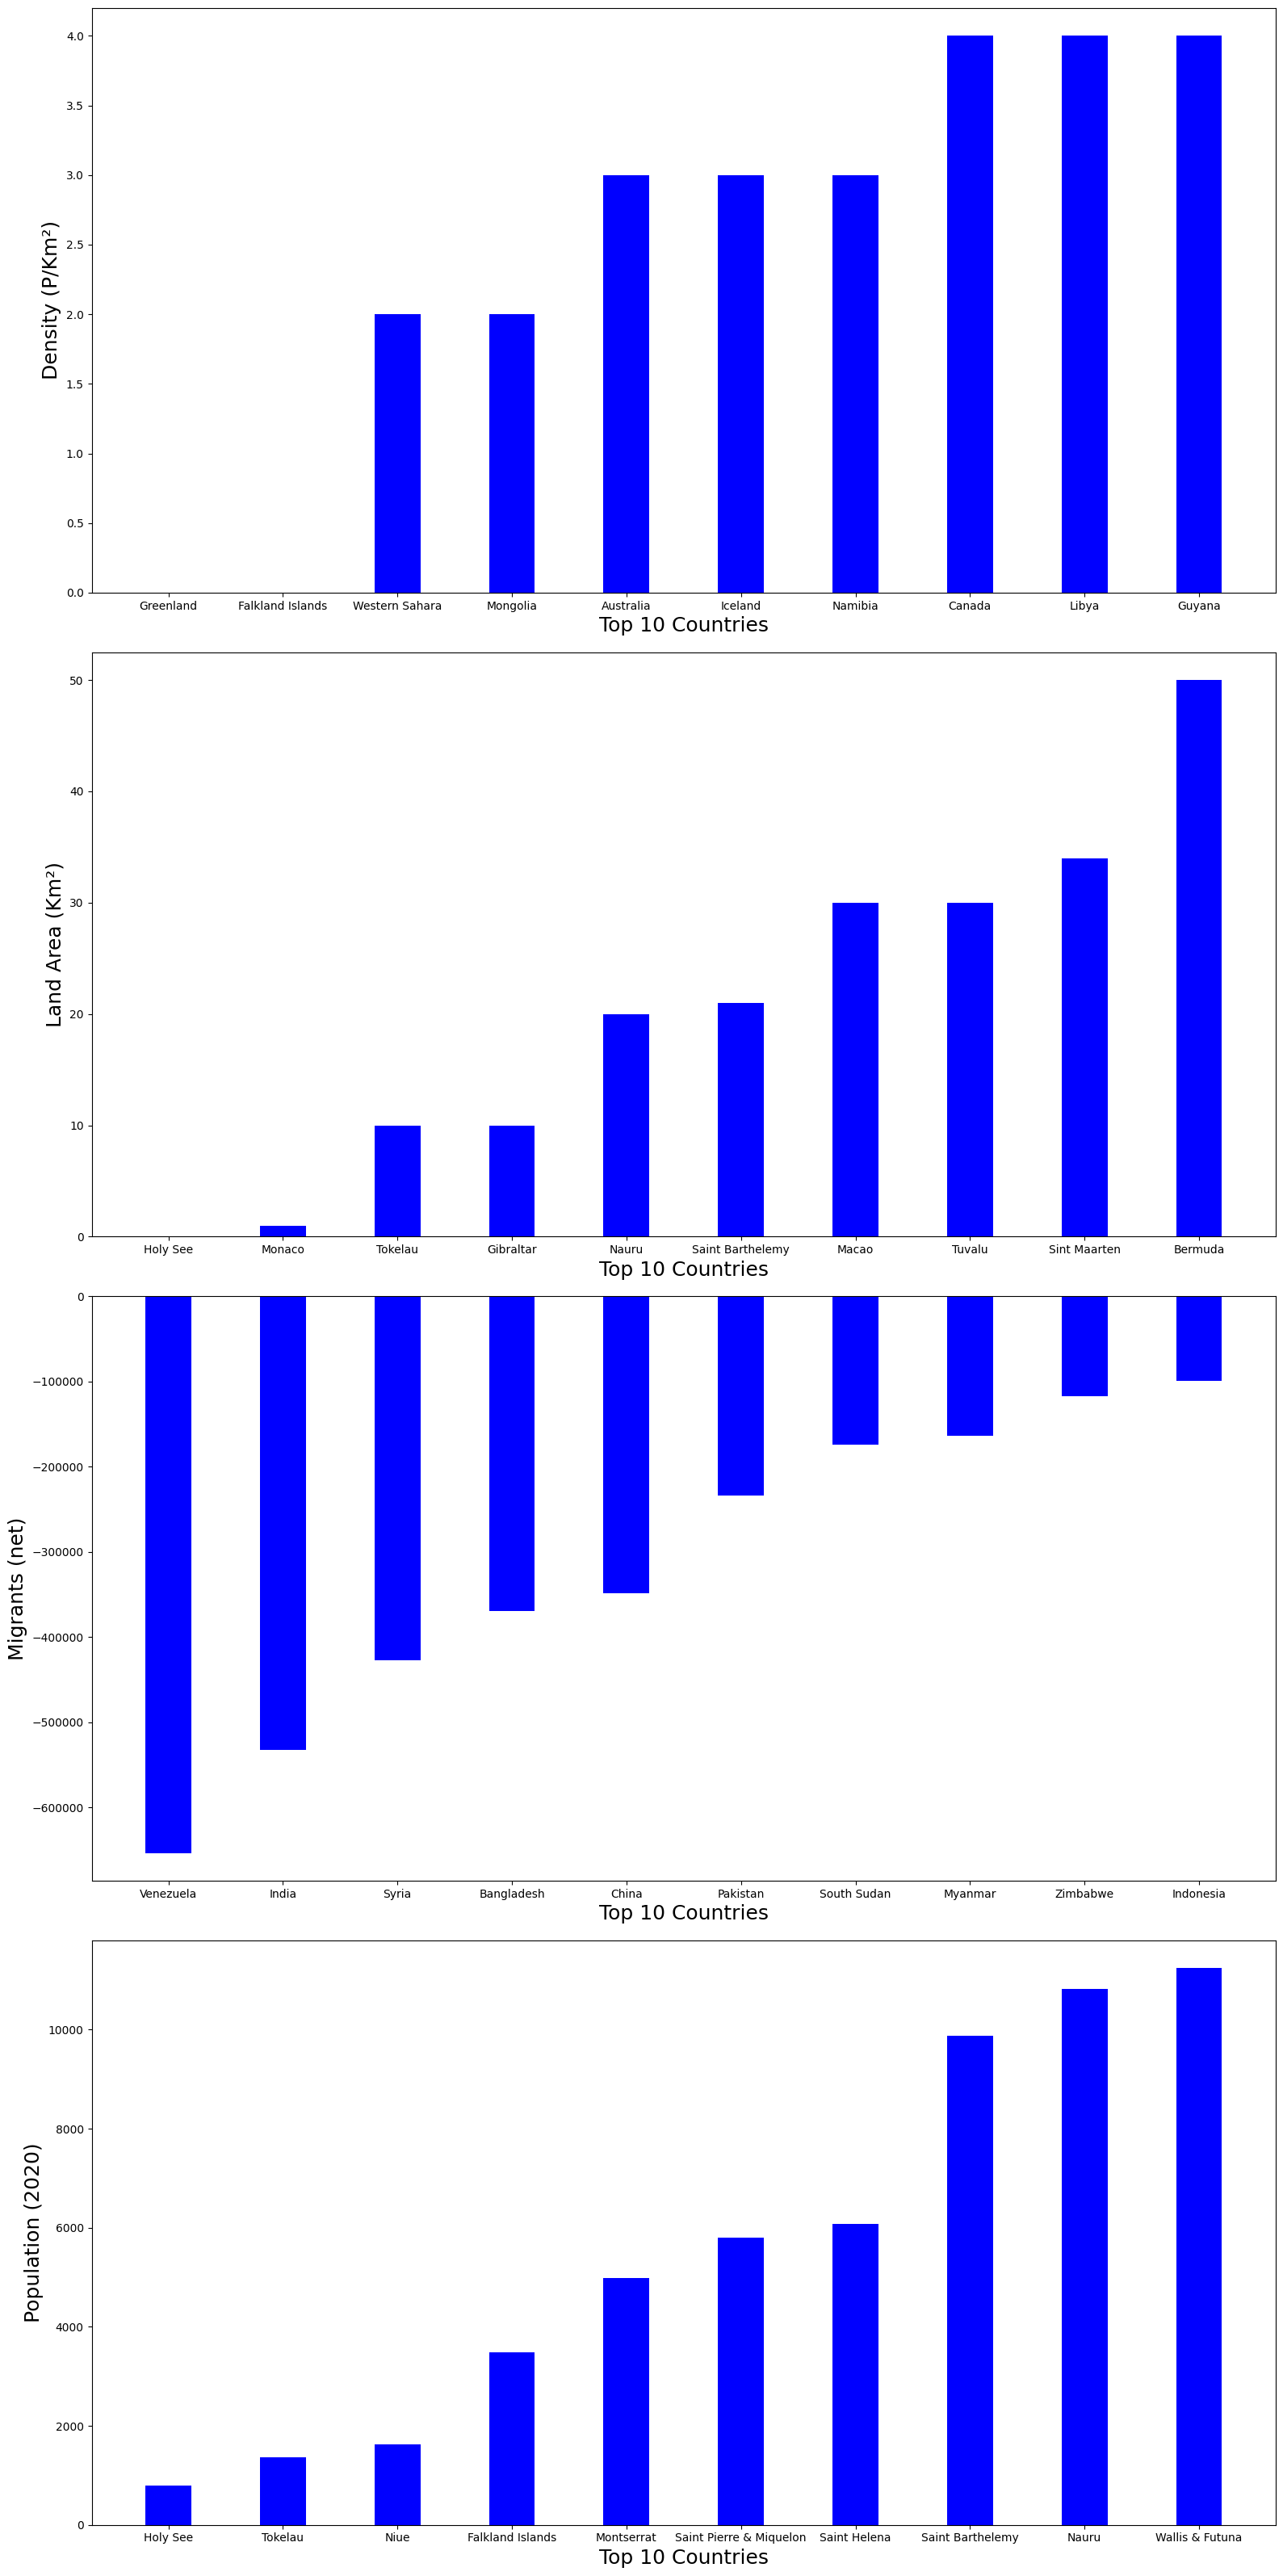

In [16]:
plt.figure(figsize=(16,32))
for i,col in enumerate(cols):
    plt.subplot(4,1,i+1)
    plt.bar(df.sort_values(col, ascending=True)['Country (or dependency)'].head(10),df.sort_values(col, ascending=True)[col].head(10),color ='blue',
        width = 0.4)
    plt.xlabel('Top 10 Countries',fontsize=18)
    plt.ylabel(col,fontsize=18)
    plt.tight_layout()

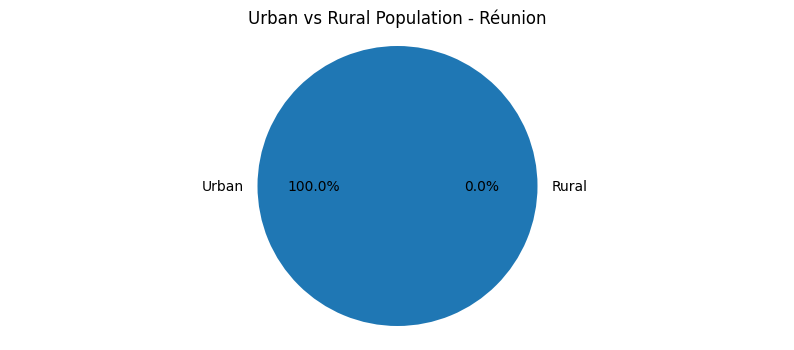

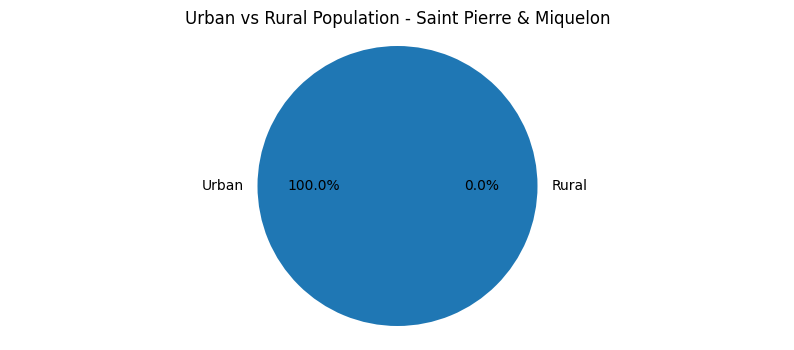

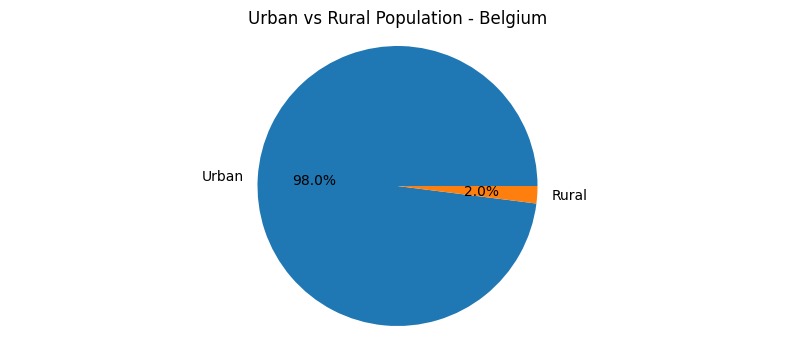

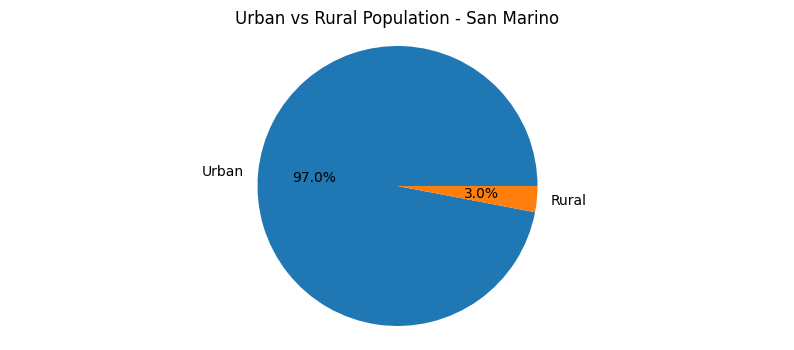

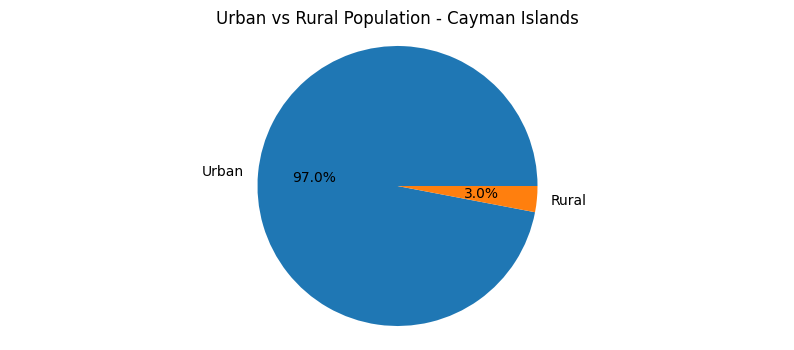

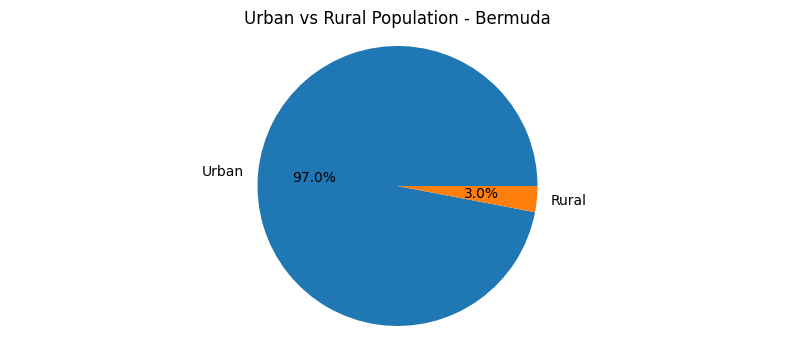

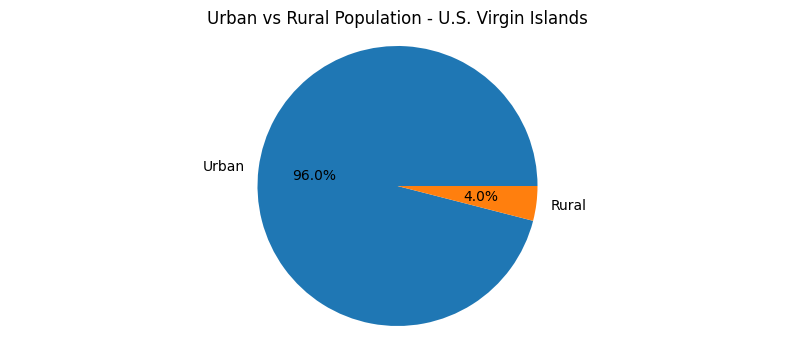

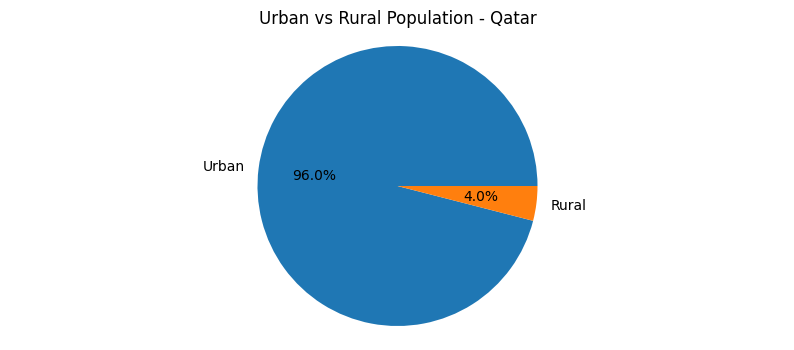

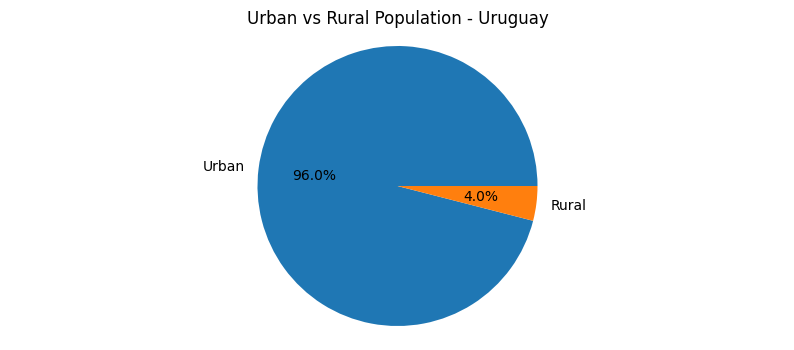

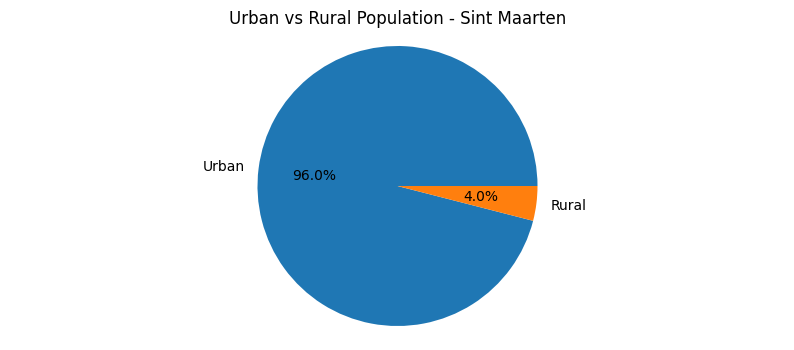

In [17]:
df_sorted = df.sort_values('Urban Pop %', ascending=False)

# Get the top 10 countries
top_10_countries = df_sorted.head(10)

# Iterate through the top 10 countries and plot individual pie charts
for index, df in top_10_countries.iterrows():
    plt.figure(figsize=(10,4))
    plt.pie([df['Urban Pop %'], 100 - df['Urban Pop %']],
            labels=['Urban', 'Rural'],
            autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(f"Urban vs Rural Population - {df['Country (or dependency)']}")
    plt.show()